# IS4303 IT-MEDIATED FINANCIAL SOLUTIONS AND PLATFORMS

> ## Homework 3 - Tree and Ensemble Methods
> ## Due Date: March 20 (Wed.), 2019, 23:00 SG Time
> ## Name your `.ipynb` file as "`StudentID_YourName_HW3.ipynb`" and then upload 
> ## Please keep your results in this notebook

<div class="alert alert-warning">
<b>Python Version:</b> 2.7+<br>Create a virtual environment in Anaconda if needed.
</div>

## Sections
<ul>
    <li><a href="#0" style="text-decoration: none">0. Goal</a></li>
    <li><a href="#1" style="text-decoration: none">1. Dataset</a></li>
    <li><a href="#2" style="text-decoration: none">2. Data Preprocessing</a></li>
    <li><a href="#3" style="text-decoration: none">3. Tree and Ensemble Learning</a></li>
    <li><a href="#4" style="text-decoration: none">4. References</a></li>
</ul>

## Summary of Ensemble Learning Methods

<div class="alert alert-success">
<b>Resources:</b> 
<a href="https://en.wikipedia.org/wiki/Ensemble_learning" target="_blank" style="text-decoration: none"><span class="label label-info">Wikipedia</span></a>
<a href="https://youtu.be/PGITM1E2CLk" target="_blank" style="text-decoration: none"><span class="label label-warning">Youtube</span></a>
<a href="https://scikit-learn.org/stable/modules/ensemble.html" target="_blank" style="text-decoration: none"><span class="label label-danger">Scikit-learn</span></a>
</div>

In [1]:
# You can also watch this youtube video in this notebook
from IPython.display import HTML, IFrame
IFrame(src="https://www.youtube.com/embed/PGITM1E2CLk", width="853", height="480")

***

<a id="0"></a>

## 0 Goal

* The goal of this assignment is to understand (1) Decision Tree (2) Ensemble Learning Methods (3) ROC and AUC.
* In this assignment, we will clean data and build linear models using a lending dataset. 
* A dataset containing complete loan data for all loans issued has been uploaded on IVLE. It includes the current loan status (Current, Late, Fully Paid, etc.) and a large set of attributes for each customer. 
* The assignment will require you to use the dataset to build models to predict loan default.
* Please answer the questions and write the code / results in the empty cells. 

<a id="1"></a>

## 1 Dataset

<br><div class="btn-group"> 
    <a href="https://en.wikipedia.org/wiki/Lending_Club" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">Introduction</a>
    <a href="#overview" class="btn btn-success" role="button" style="text-decoration: none">Overview</a>
    <a href="https://www.lendingclub.com/info/download-data.action" target="_blank" class="btn btn-info" role="button" style="text-decoration: none">Attributes</a> 
    <a href="#task" class="btn btn-warning" role="button" style="text-decoration: none">Tasks</a>
</div>

#### Introduction

[LendingClub](https://en.wikipedia.org/wiki/Lending_Club) is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. Lending Club is the world's largest peer-to-peer lending platform. The company claims that \$15.98 billion in loans had been originated through its platform up to December 31, 2015.

Lending Club enables borrowers to create unsecured personal loans between $\text{\$1,000}$ and $\text{\$40,000}$. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.

Lending Club also makes traditional direct to consumer loans, including automobile refinance transactions, through WebBank, an FDIC-insured, state-chartered industrial bank that is headquartered in Salt Lake City Utah. The loans are not funded by investors but are assigned to other financial institutions.

In this homwork, we will use data from the Lending Club to predict whether the loan will default (along with prediction probabilities).

<a id="overview"></a>
#### Overview
The file <b>`LoanStats_2018Q{N}.csv`</b> contains complete loan data for all loans issued through the 2018 Quarter-{N}, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others.  <br/>

#### Attributes
The dataset can be downloaded [here](https://www.lendingclub.com/info/download-data.action) and it has also been uploaded in the `Homework` folder on IVLE. Information on the columns and features can be found in data dictionary. A data dictionary is provided in a separate file <b>`LCDataDictionary.xlsx`</b>.

<a id="task"></a>
#### Tasks: Data Cleaning, Pre-processing and Penalized Regression
* The original dataset that you have downloaded has multiple attributes of each loan, along with an indicator of the `loan status`. 
* The status of the loan is 1 if the loan was “charged off” (CO), delinquent, or late in payment, and 0 otherwise. This is the outcome we are trying to predict in the analysis.   


## Questions:
* [Question 1](#Q1)
* [Question 2](#Q2)
* [Question 3](#Q3)
* [Question 4](#Q4)
* [Question 5](#Q5)
* [Question 6](#Q6)

<a id="2"></a> 

## 2 Data Preprocessing

In [2]:
#!usr/bin/env python
#-*- coding:utf-8 -*-
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, log
from functools import reduce, partial
from collections import defaultdict
from IPython.display import HTML
%matplotlib inline

<div class="alert alert-warning">
<b>Step 1: Read data into python pandas and named as "loans".</b>
</div>

In [3]:
%pwd
loan1 = pd.read_csv("./LoanStats_2018Q1.csv", low_memory=False, header=1)
loan2 = pd.read_csv("./LoanStats_2018Q2.csv", low_memory=False, header=1)
loan3 = pd.read_csv("./LoanStats_2018Q3.csv", low_memory=False, header=1)

# Append multiple datasets
dataset = [loan1, loan2, loan3]
loans = reduce(lambda left, right: pd.concat([left, right], ignore_index=True), dataset)
loans.head(n=10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000.0,10000.0,10000.0,60 months,14.07%,233.05,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2600.0,2600.0,2600.0,36 months,7.96%,81.43,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000.0,10000.0,10000.0,36 months,6.07%,304.54,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,7.96%,313.18,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,11200.0,11200.0,11200.0,60 months,30.79%,367.82,G,G1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,20000.0,20000.0,20000.0,60 months,10.90%,433.86,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,23000.0,23000.0,23000.0,60 months,12.61%,518.75,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,34825.0,34825.0,34825.0,60 months,12.61%,785.45,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,14000.0,14000.0,14000.0,60 months,18.45%,358.95,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,10000.0,10000.0,10000.0,60 months,16.01%,243.24,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loans.shape

(366836, 145)

<div class="alert alert-warning">
<b>Step 2: Delete rows when <code><b><i>loan_status</i></b></code> is "Current".</b> 
</div>

In [5]:
loans = loans[loans['loan_status'] != 'Current']

<div class="alert alert-warning">
<b>Step 3: Create a new variable <code><b><i>bad_loans</i></b></code>: 1 means a risky (bad) loan, and 0 means a safe loan. A loan is risky when loan status is "Charged Off", "Late (16-30 days)", or "Late (31-120 days)", and the loan is safe when otherwise.</b>
</div>

In [6]:
bad_status = ['Late (31-120 days)', 'Late (16-30 days)', 'Charged Off']
loans['bad_loans'] = loans['loan_status'].map(lambda x: 1 if x in bad_status else 0)

<div class="alert alert-warning">
<b>Step 4: Use a subset of numerical features.</b>
<div class="alert alert-danger">
<b>Note:</b><p>Definitions of all columns are provided in a seperate file <b>LCDataDictionary.xlsx</b>.</p>
</div>
</div>

In [7]:
from copy import deepcopy
loans_new = deepcopy(loans) # Please note the difference between shallow copy and deep copy in Python

# We select 70 numerical features
feature_full_list = ['acc_now_delinq','acc_open_past_24mths','all_util','annual_inc','avg_cur_bal','bc_open_to_buy','bc_util',
                     'chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_amnt','dti','inq_fi','inq_last_12m','inq_last_6mths',
                     'installment','int_rate','last_pymnt_amnt','loan_amnt','max_bal_bc','mo_sin_old_il_acct','mo_sin_old_rev_tl_op',
                     'mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_last_delinq','mths_since_rcnt_il',
                     'num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl',
                     'num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m',
                     'open_acc','open_acc_6m','open_act_il','open_il_12m','open_il_24m','open_rv_12m','open_rv_24m','out_prncp',
                     'out_prncp_inv','pct_tl_nvr_dlq','percent_bc_gt_75','pub_rec_bankruptcies','revol_bal','revol_util','tax_liens',
                     'tot_coll_amt','tot_cur_bal','tot_hi_cred_lim','total_acc','total_bal_ex_mort','total_bal_il','total_bc_limit',
                     'total_cu_tl','total_il_high_credit_limit','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee',
                     'total_rec_prncp','total_rev_hi_lim','delinq_2yrs']
output = 'bad_loans'
loans_new = loans_new[feature_full_list+[output]]
loans_new.dtypes

acc_now_delinq                float64
acc_open_past_24mths          float64
all_util                      float64
annual_inc                    float64
avg_cur_bal                   float64
bc_open_to_buy                float64
bc_util                       float64
chargeoff_within_12_mths      float64
collections_12_mths_ex_med    float64
delinq_amnt                   float64
dti                           float64
inq_fi                        float64
inq_last_12m                  float64
inq_last_6mths                float64
installment                   float64
int_rate                       object
last_pymnt_amnt               float64
loan_amnt                     float64
max_bal_bc                    float64
mo_sin_old_il_acct            float64
mo_sin_old_rev_tl_op          float64
mo_sin_rcnt_rev_tl_op         float64
mo_sin_rcnt_tl                float64
mort_acc                      float64
mths_since_last_delinq        float64
mths_since_rcnt_il            float64
num_accts_ev

<div class="alert alert-warning">
<b>Step 5: Transform non-numerical features to numerical.</b>
</div>

In [8]:
# Transform object type to numerical type
loans_new['int_rate'] = loans_new['int_rate'].str.rstrip('%').astype('float')
loans_new['revol_util'] = loans_new['revol_util'].str.rstrip('%').astype('float')

<div class="alert alert-warning">
<b>Step 6: Drop Missing Values.</b>
</div>

In [9]:
# Remove missing values and summary statistics
loans_new.dropna(inplace=True)
print(loans_new.shape)
loans_new.describe()

(18401, 71)


,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_amnt,...,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,delinq_2yrs,bad_loans
count,18401.000000,18401.000000,18401.000000,1.840100e+04,18401.000000,18401.000000,18401.000000,18401.000000,18401.000000,18401.000000,...,18401.000000,1.840100e+04,18401.000000,18401.000000,18401.000000,18401.000000,18401.000000,1.840100e+04,18401.000000,18401.000000
mean,0.000272,5.337916,55.530841,8.419596e+04,15849.153253,12405.287756,47.871768,0.019075,0.028585,4.305527,...,1.812673,4.924770e+04,10910.063010,10906.947007,809.884391,2.156866,10067.439712,3.292046e+04,0.559589,0.254280
std,0.016482,3.587954,21.505753,9.755122e+04,18355.181214,16781.011689,29.933032,0.168804,0.184886,277.418883,...,2.980364,4.885135e+04,10280.581561,10278.609704,896.871373,12.225426,10092.102481,3.340943e+04,1.085800,0.435467
min,0.000000,0.000000,0.000000,5.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02,0.000000,0.000000
25%,0.000000,3.000000,42.000000,5.000000e+04,3421.000000,2300.000000,22.500000,0.000000,0.000000,0.000000,...,0.000000,1.835700e+04,2927.800000,2925.320000,188.520000,0.000000,1723.890000,1.400000e+04,0.000000,0.000000
50%,0.000000,5.000000,57.000000,7.000000e+04,9465.000000,6616.000000,46.200000,0.000000,0.000000,0.000000,...,1.000000,3.730800e+04,7373.532456,7369.120000,503.730000,0.000000,6684.920000,2.450000e+04,0.000000,0.000000
75%,0.000000,7.000000,71.000000,1.000000e+05,22511.000000,15850.000000,73.400000,0.000000,0.000000,0.000000,...,2.000000,6.580500e+04,15843.698066,15843.010000,1108.410000,0.000000,15000.000000,4.130000e+04,1.000000,1.000000
max,1.000000,35.000000,138.000000,9.300000e+06,285326.000000,326373.000000,158.600000,9.000000,5.000000,33356.000000,...,42.000000,1.380346e+06,46049.557319,46049.560000,9095.340000,341.160000,40000.000000,1.123500e+06,19.000000,1.000000


In [10]:
# Save a copy 
from copy import deepcopy
data = deepcopy(loans_new)

<a id="3"></a>

## 3 Tree and Ensemble Learning

In [11]:
# Import libraries
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc,roc_auc_score

# Read data
data.head(n=10)

,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_amnt,...,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,delinq_2yrs,bad_loans
48,0.0,2.0,47.0,55000.0,2222.0,10551.0,52.0,0.0,0.0,0.0,...,1.0,27751.0,5013.306667,5013.31,13.31,0.0,5000.00,33800.0,0.0,0
110,0.0,3.0,1.0,52000.0,25099.0,30359.0,0.5,0.0,0.0,0.0,...,2.0,0.0,3011.577285,3011.58,11.58,0.0,3000.00,31000.0,0.0,0
113,0.0,3.0,86.0,51000.0,4541.0,2498.0,0.1,0.0,0.0,0.0,...,0.0,24001.0,1032.903619,1032.90,32.90,0.0,1000.00,2500.0,0.0,0
129,0.0,6.0,36.0,50000.0,28556.0,22151.0,38.8,0.0,0.0,0.0,...,0.0,27925.0,1909.610000,1909.61,1111.37,0.0,798.24,45000.0,2.0,1
168,0.0,7.0,79.0,79500.0,25431.0,4982.0,40.0,0.0,0.0,0.0,...,0.0,46208.0,1969.420000,1969.42,1215.20,0.0,754.22,12800.0,2.0,1
172,0.0,13.0,44.0,30000.0,4490.0,4787.0,0.3,0.0,0.0,0.0,...,0.0,99799.0,3378.985965,3378.99,178.99,0.0,3200.00,8600.0,0.0,0
183,0.0,1.0,21.0,38200.0,174.0,1406.0,33.0,0.0,0.0,0.0,...,0.0,0.0,7383.466710,7383.47,383.47,0.0,7000.00,3300.0,0.0,0
263,0.0,4.0,66.0,150000.0,64748.0,19280.0,57.7,0.0,0.0,0.0,...,1.0,49339.0,30780.845492,30780.85,780.85,0.0,30000.00,52600.0,2.0,0
265,0.0,8.0,87.0,68796.0,55757.0,377.0,91.6,0.0,0.0,0.0,...,6.0,32796.0,32358.693413,32358.69,2358.69,0.0,30000.00,9500.0,0.0,0
280,0.0,8.0,69.0,36000.0,6677.0,8166.0,87.3,0.0,0.0,0.0,...,2.0,143934.0,8844.780000,8836.88,1628.30,0.0,1627.15,110500.0,0.0,1


<div class="alert alert-warning">
<b>Step 7: Train-Test Split</b>
</div>

In [12]:
# Split the dataset
output = 'bad_loans'
X = data.drop(output, axis=1) # Here no need to set inplace=True
y = data[output]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
print(y_train.sum()/y_train.count(),y_test.sum()/y_test.count())

0.2579192546583851 0.2457888063756566


<a id="Q1"></a>

<div class="alert alert-info">
<b>Question 1 (1 point): Decision Tree For Classification</b> 
<p>Please fit training data with <b>Classification Tree</b> model.</p>
<p>Please report/print test accuracy on the <code><b>test</b></code> dataset.</p>
<p><b>Remember: </b>Set <code><b>random_state=12345</b></code> so that results can be replicated.</p> 
<p>You can refer to: </p>
<div class="btn-group">    
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">Classification Tree</a>
</div>
</div>

In [13]:
# Fit the model on train data
dtree = DecisionTreeClassifier(random_state=12345)
dtree_model = dtree.fit(X_train, y_train)
dtree_model.classes_

array([0, 1], dtype=int64)

In [14]:
# Get predicted labels for test data
y_pred_tree = dtree_model.predict(X_test)

# Performance of model on test data
print("Test Accuracy of Classificatioin Tree Model: ", accuracy_score(y_test, y_pred_tree))
print("Test Error of Classificatioin Tree Model: ", 1 - accuracy_score(y_test, y_pred_tree))

Test Accuracy of Classificatioin Tree Model:  0.8811809454808911
Test Error of Classificatioin Tree Model:  0.1188190545191089


<a id="Q2"></a>

<div class="alert alert-info">
<b>Question 2 (2 points): Ensemble Methods For Classification</b> 
<p>Please fit training data with <b>Bagging model</b>, <b>Random Forest model</b>, <b>AdaBoosting model</b> and <b>Gradient Boosting model</b>.</p>
<p>Please report/print test accuracy scores of these 4 models on the <code><b>test</b></code> dataset.</p>
<p><b>Remember: </b>Set <code><b>n_estimators=50</b></code> and <code><b>random_state=12345</b></code> so that results can be replicated.</p> 
<p>You can refer to: </p>
<div class="btn-group">    
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">Bagging</a>
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" target="_blank" class="btn btn-success" role="button" style="text-decoration: none">Random Forest</a>
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html" target="_blank" class="btn btn-warning" role="button" style="text-decoration: none">AdaBoost</a>
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html" target="_blank" class="btn btn-danger" role="button" style="text-decoration: none">Gradient Boost</a>
</div>
</div>

In [15]:
# Number of base learners
N = 50

In [16]:
Bag = BaggingClassifier(n_estimators=N, random_state=12345)
Bag_model = Bag.fit(X_train, y_train)
Bag_model.classes_

array([0, 1], dtype=int64)

In [17]:
# Get predicted labels for test data
y_pred_Bag = Bag_model.predict(X_test)

# Performance of model on test data
print("Test Accuracy of Bagging Model: ", accuracy_score(y_test, y_pred_Bag))
print("Test Error of Bagging Model: ", 1 - accuracy_score(y_test, y_pred_Bag))

Test Accuracy of Bagging Model:  0.9043651512407173
Test Error of Bagging Model:  0.09563484875928274


In [18]:
RF = RandomForestClassifier(n_estimators=N, random_state=12345)
RF_model = RF.fit(X_train, y_train)
RF_model.classes_

array([0, 1], dtype=int64)

In [19]:
# Get predicted labels for test data
y_pred_RF = RF_model.predict(X_test)

# Performance of model on test data
print("Test Accuracy of Random Forest Model: ", accuracy_score(y_test, y_pred_RF))
print("Test Error of Random Forest Model: ", 1 - accuracy_score(y_test, y_pred_RF))

Test Accuracy of Random Forest Model:  0.9083499366056874
Test Error of Random Forest Model:  0.09165006339431259


In [20]:
Ada = AdaBoostClassifier(n_estimators=N, random_state=12345)
Ada_model = Ada.fit(X_train, y_train)
Ada_model.classes_

array([0, 1], dtype=int64)

In [21]:
# Get predicted labels for test data
y_pred_Ada = Ada_model.predict(X_test)

# Performance of model on test data
print("Test Accuracy of Adaboosting Model: ", accuracy_score(y_test, y_pred_Ada))
print("Test Error of Adaboosting Model: ", 1 - accuracy_score(y_test, y_pred_Ada))

Test Accuracy of Adaboosting Model:  0.9000181126607498
Test Error of Adaboosting Model:  0.09998188733925018


In [22]:
GB = GradientBoostingClassifier(n_estimators=N, random_state=12345)
GB_model = GB.fit(X_train, y_train)
GB_model.classes_

array([0, 1], dtype=int64)

In [23]:
# Get predicted labels for test data
y_pred_GB = GB_model.predict(X_test)

# Performance of model on test data
print("Test Accuracy of Gradient Boosting Model: ", accuracy_score(y_test, y_pred_GB))
print("Test Error of Gradient Boosting Model: ", 1 - accuracy_score(y_test, y_pred_GB))

Test Accuracy of Gradient Boosting Model:  0.9061764173157036
Test Error of Gradient Boosting Model:  0.09382358268429636


<a id="Q3"></a>

<div class="alert alert-info">
<b>Question 3 (3 points): Confusion Matrix, ROC and AUC</b> 
<p>Please print/report confusion matrix (i.e., true/false positive/negative) of the tree model in Question 1, and the 4 ensemble models in Question 2, on test data.</p>
<p>Please plot ROC curves and report/print AUC values of the tree model in Question 1, and the 4 ensemble models in Question 2, on test data.</p>
<p><b>Remember: </b>Set <code><b>n_estimators=50</b></code> and <code><b>random_state=12345</b></code> so that results can be replicated.</p> 
<p>You can refer to: </p>
<div class="btn-group"> 
    <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics" target="_blank" class="btn btn-success" role="button" style="text-decoration: none">Performance Metrics</a>
    <a href="https://matplotlib.org/users/pyplot_tutorial.html" target="_blank" class="btn btn-warning" role="button" style="text-decoration: none">Matplotlib</a>
</div>
</div>

In [24]:
def model_performance(model, features_train, output_train, features_test, output_test):
    '''This function is used to calculate various model performance metrics.
    Inputs:
    1) model: The model you are using
    2) features_train: The feature matrix of train data
    3) output_train: The output label of train data
    4) features_test: The feature matrix of test data
    5) output_test: The output label of test data
    
    Outputs:
    1) accuracy: Classification accuracy score
    2) error: Classification error = 1 - accuracy
    3) tp: True positive cases
    4) fp: False positive cases
    5) tn: True negative cases
    6) fn: False negative cases
    7) cm: Confusion matrix
    8) sensitivity: True positive rate or Recall
    9) specificity: True negative rate
    10) precision: Positive predictive value
    11) f1: F1 score
    12) thresholds: Thresholds for Pr(y=1)
    13) fpr: False positive rates
    14) tpr: True positive rates
    15) roc_auc: Area under curve of ROC   
    
    '''
    
    # Fit the model:
    model_fit = model.fit(features_train, output_train)

    # Get predicted labels for test data
    output_pred = model_fit.predict(features_test)

    # Create performance metrics of test data
    cm = confusion_matrix(output_test, output_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = accuracy_score(output_test, output_pred)
    error = 1 - accuracy
    sensitivity = recall_score(output_test, output_pred)
    specificity = tn / (tn+fp)
    precision = precision_score(output_test, output_pred)
    f1 = f1_score(output_test, output_pred)    

    # Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
    scores = model_fit.predict_proba(features_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(output_test, scores) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
    roc_auc = auc(fpr, tpr)
    
    return {
        'accuracy': accuracy,
        'error': error,
        'tp': tp,
        'fp': fp,
        'tn': tn,
        'fn': fn,
        'confusion_matrix': cm,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'precision': precision,
        'f1': f1,
        'thresholds': thresholds,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc        
    }

In [25]:
# Models: tree, Bag, RF, Ada, GB
models = [dtree, Bag, RF, Ada, GB]
get_performance = partial(model_performance, features_train=X_train, output_train=y_train, features_test=X_test, output_test=y_test)
dtree_performance, Bag_performance, RF_performance, Ada_performance, GB_performance = map(lambda x: get_performance(x), models)

In [26]:
'''
Confusion Matrix:
[tn, fp]
[fn, tp]
'''
print("Confusion Matrix of Classification Tree Model: \n {} \n".format(dtree_performance['confusion_matrix']))
print("Confusion Matrix of Bagging Model: \n {} \n".format(Bag_performance['confusion_matrix']))
print("Confusion Matrix of Random Forest Model: \n {} \n".format(RF_performance['confusion_matrix']))
print("Confusion Matrix of AdaBoosting Model: \n {} \n".format(Ada_performance['confusion_matrix']))
print("Confusion Matrix of Gradient Boosting Model: \n {} \n".format(GB_performance['confusion_matrix']))

Confusion Matrix of Classification Tree Model: 
 [[3849  315]
 [ 341 1016]] 

Confusion Matrix of Bagging Model: 
 [[3746  418]
 [ 110 1247]] 

Confusion Matrix of Random Forest Model: 
 [[3730  434]
 [  72 1285]] 

Confusion Matrix of AdaBoosting Model: 
 [[3796  368]
 [ 184 1173]] 

Confusion Matrix of Gradient Boosting Model: 
 [[3697  467]
 [  51 1306]] 



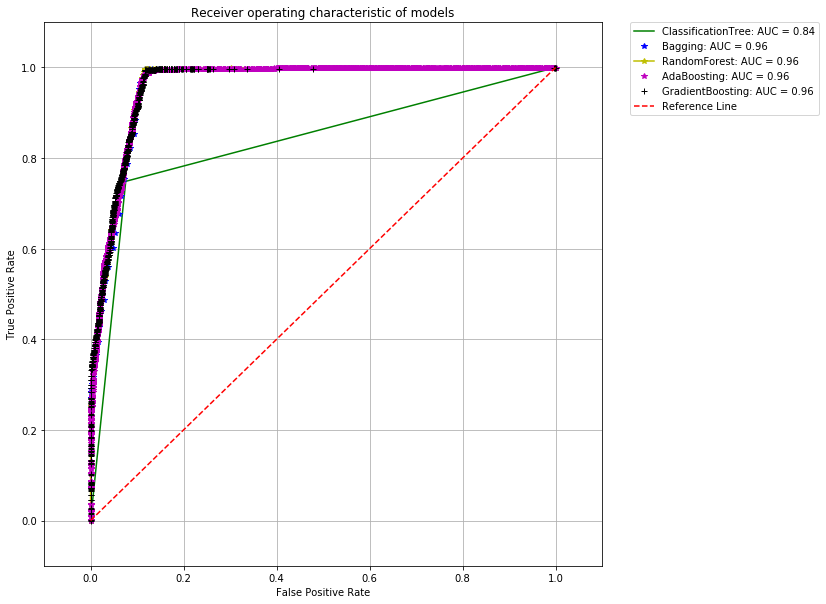

In [27]:
# ROC and AUC of test data
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(dtree_performance['fpr'], dtree_performance['tpr'], 'g-', label='ClassificationTree: AUC = %0.2f'% dtree_performance['roc_auc'])
plt.plot(Bag_performance['fpr'], Bag_performance['tpr'], 'b*', label='Bagging: AUC = %0.2f'% Bag_performance['roc_auc'])
plt.plot(RF_performance['fpr'], RF_performance['tpr'], 'y*-', label='RandomForest: AUC = %0.2f'% RF_performance['roc_auc'])
plt.plot(Ada_performance['fpr'], Ada_performance['tpr'], 'm*', label='AdaBoosting: AUC = %0.2f'% Ada_performance['roc_auc'])
plt.plot(GB_performance['fpr'], GB_performance['tpr'], 'k+', label='GradientBoosting: AUC = %0.2f'% GB_performance['roc_auc'])
plt.plot([0,1], [0,1], 'r--', label='Reference Line')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic of models')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
# Make it more interactive
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
from sklearn.metrics import roc_curve, auc
py.offline.init_notebook_mode(connected=True)

ensemble_performance = list(zip(['Tree','Bagging','RandomForest','Adaboost','GradientBoost'], \
                                [dtree_performance, Bag_performance, RF_performance, Ada_performance, GB_performance]))

layout = go.Layout(
    title = 'Receiver operating characteristic of models',
    xaxis = {
        'title': 'False Positive Rate',
        'range': [0, 1.1]
    },
    yaxis = {
        'title': 'True Positive Rate',
        'range': [0, 1.1]
    }
)

trace_reference = go.Scatter(
    x = [0, 1],
    y = [0, 1],
    mode = 'lines',
    name = 'Reference Line',
    line = {
        'shape': 'spline',
        'dash': 'dashdot',
        'color': 'red',
        'width': 2
    }    
)

trace = [trace_reference]
for item in ensemble_performance:
    trace_roc = go.Scatter(
        x = item[1]['fpr'],
        y = item[1]['tpr'],
        name = '%s: Accuracy=%f, AUC=%f' %(item[0], item[1]['accuracy'], item[1]['roc_auc']),
    )
    trace.append(trace_roc)

fig = go.Figure(data=trace, layout=layout)
py.offline.iplot(fig)                     

<a id="Q4"></a>

<div class="alert alert-info">
<b>Question 4 (2 points): Ensemble Methods and Model Performance</b> 
<p>Based on your results in Question 3, do you think that ensemble learning methods can improve model performance? If yes, why do you think so? What are the advantages of these ensemble methods.</p>
</div>

In [29]:
# Open question
# Remember Bias-Variance Tradeoff
# Bagging: Reduces variance, but subject to whether base models are correlated to each other or not;
# Random Forest: Reduces variance without increasing bias a lot;
# Boosting: Reduces bias mainly, but whether it reduces variance is still questionable. Some textbooks say that boosting reduces variance 
# because each base model is very simple in structure (simple model will not have high variance). Some others say that boosting may pay much 
# attention to outliers in the noisy data (think about how does adaboost work)

<a id="Q5"></a>

<div class="alert alert-info">
<b>Question 5 (3 points): Model Complexity And Performance</b> 
<p>Will model performance (e.g., accuracy, recall/sensitivity, precision, AUC, etc.) on test data be improved or not, if we increase the number of base learners of these 4 ensemble models? Is it always beneficial to increase the number of base learners? Write your arguments.</p>
<p>Please also use visualization tools (e.g., plot/chart/diagram) to support your arguments.</p>
<p><b>Remember: </b>Set <code><b>random_state=12345</b></code> so that results can be replicated.</p> 
<p>You can refer to: </p>
<div class="btn-group">    
    <a href="https://matplotlib.org/users/pyplot_tutorial.html" target="_blank" class="btn btn-warning" role="button" style="text-decoration: none">Matplotlib</a>
</div>

In [30]:
# Number of base learners
N_base = [5, 10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Performance Metrics
metrics = ['accuracy','error', 'sensitivity', 'precision', 'roc_auc']

In [31]:
# Initialize models
models = {'Bagging': BaggingClassifier(random_state=12345),
          'RandomForest': RandomForestClassifier(random_state=12345),
          'AdaBoosting': AdaBoostClassifier(random_state=12345),
          'GradientBoosting': GradientBoostingClassifier(random_state=12345)
         }

In [32]:
# Initialize performance metrics of different models with different number of base learners
# metrics[Which_model][Which_metric]
performance = defaultdict(lambda: defaultdict(lambda: []))

In [33]:
# It will run for minutes. Please wait.
for model_name in models.keys():
    for n in N_base:
        this_model = models[model_name].set_params(n_estimators=n)
        pfm = model_performance(this_model, X_train, y_train, X_test, y_test)
        
        for metric in metrics:
            performance[model_name][metric].append(pfm[metric])     

In [34]:
def plot_performance(model_performance, performance_metric, base_learners):
    '''This function is used to plot performance metrics with different number of base learners.
    Inputs:
    1) model_performance: A dictionary storing model performance metrics
    2) performance_metric: Which performance metric to be plotted
    3) base_learners: A list of base learner counts
    
    Outputs:
    1) Plots of different performance metrics  
    
    '''
    
    plt.figure(figsize=(10,5))
    plt.plot(base_learners, model_performance['Bagging'][performance_metric], 'g-', label='Bagging: %s' % performance_metric )
    plt.plot(base_learners, model_performance['RandomForest'][performance_metric], 'r--', label='RandomForest: %s' % performance_metric)
    plt.plot(base_learners, model_performance['AdaBoosting'][performance_metric], 'm-o', label='AdaBoosting: %s' % performance_metric)
    plt.plot(base_learners, model_performance['GradientBoosting'][performance_metric], 'k-.', label='GradientBoosting: %s' % performance_metric)
    plt.grid(True)
    plt.xlabel('Number of base estimators')
    plt.ylabel('%s' % performance_metric)
    plt.title('%s on test data' % performance_metric)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()    

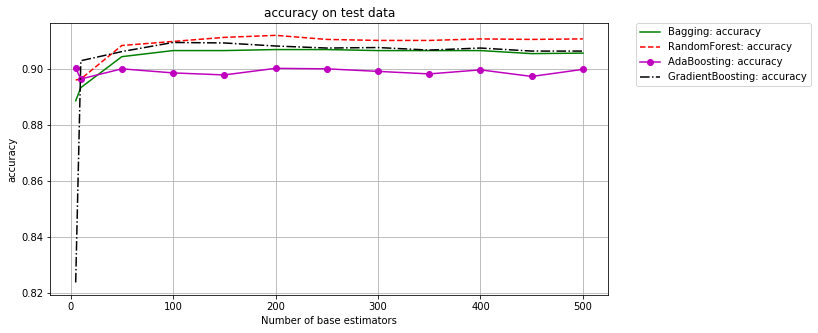

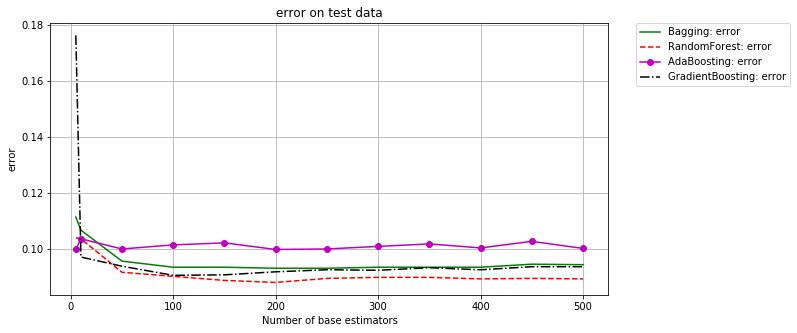

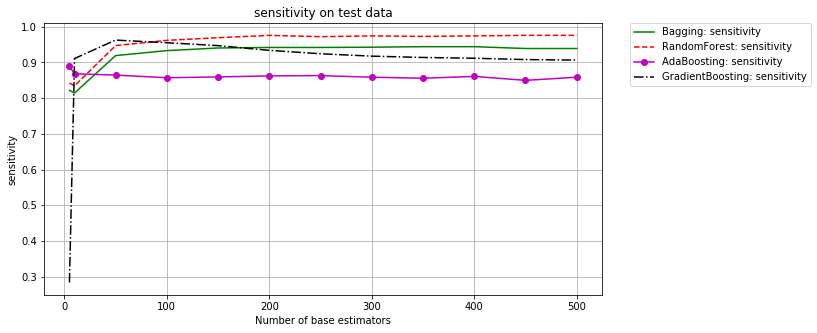

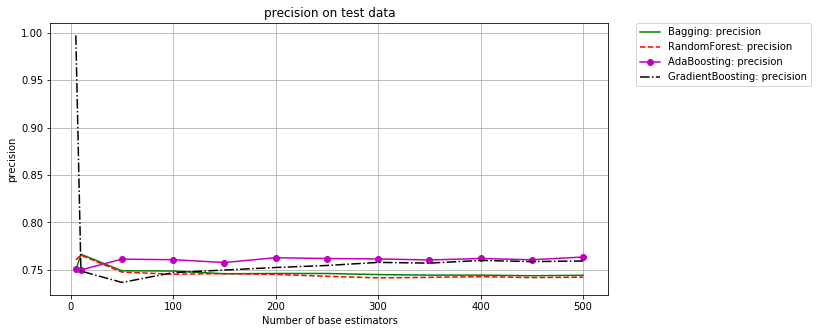

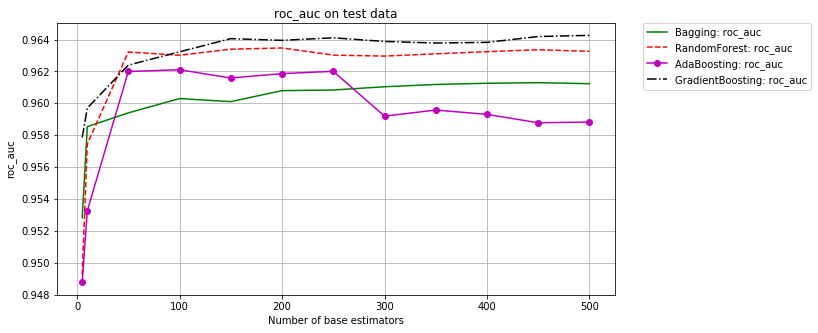

In [35]:
for metric in metrics:
    plot_performance(performance, metric, N_base)

<a id="Q6"></a>

<div class="alert alert-info">
<b>Question 6 (1 point): Limitations of Ensemble Methods</b> 
<p>Based on your knowledge, what are limitations/weakness/disadvantages of these ensemble methods (e.g., bagging, randomforest, gradientboost)? What may influence predictive power of these models?</p>
</div>

In [36]:
# Open question:
# 1. Lack of interpretability
# 2. Costly to train an ensemble model
# 3. If base models generated are correlated with each other (similar structure), then the benefit of ensemble methods is just minimal.
# Whether base models are independent or correlated will influence the predictive power of ensemble models.

<a id="4"></a>